In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def strip(text):
    try:
        return text.strip()
    except AttributeError:
        return text

def strip_time(text):
    return text[:6].strip()

def make_int(text):
    return int(text.strip())

def make_float(text):
    return float(text.strip())

dtypes = {'Dataset': 'category',
          'Model': 'category',
          'Seed': np.int32,
          'NumNodes': np.int32,
          'BestEpoch': np.int32,
          'TestAcc': np.float64,
          'TestLoss': np.float64,
          'ValAcc': np.float64,
          'ValLoss': np.float64,
          'Device': 'category',
          'Time': np.float64
          }

converters = {'Dataset': strip,
          'Model': strip,
          'Seed': make_int,
          'NumNodes': make_int,
          'BestEpoch': make_int,
          'TestAcc': make_float,
          'TestLoss': make_float,
          'ValAcc': make_float,
          'ValLoss': make_float,
          'Device': strip,
          'Time': strip_time
          }

In [3]:
results = pd.read_csv('../results/train_log_exp6.csv', header=0, converters=converters)
columns = [x.strip() if x!=' Model' else 'CorruptionRate' for x in list(dtypes.keys())]
results.columns = columns
results['Time'] = results['Time'].astype('float64')

In [4]:
results.head()

,Dataset,Model,Seed,NumNodes,BestEpoch,TestAcc,TestLoss,ValAcc,ValLoss,Device,Time
0,IMDB-BINARY,GCN,1314,10,263,0.740,0.8320,0.67,1.2005,cuda,17.29
1,IMDB-BINARY,GCN,11314,10,148,0.720,0.7000,0.77,0.8098,cuda,16.33
2,IMDB-BINARY,GCN,21314,10,44,0.720,0.5518,0.79,0.4725,cuda,16.75
3,IMDB-BINARY,GCN,31314,10,33,0.715,0.5410,0.78,0.5384,cuda,18.48
4,IMDB-BINARY,GCN,41314,10,23,0.750,0.4707,0.75,0.5117,cuda,16.79


In [5]:
grouped = results.drop(['Model', 'Device'],axis=1).groupby(['NumNodes', 'Dataset']).agg([np.mean, np.std, np.count_nonzero]).loc[:,['TestAcc', 'Time']]
grouped

TestAcc                             Time            \
                           mean       std count_nonzero     mean       std   
NumNodes Dataset                                                             
10       IMDB-BINARY    0.72900  0.014103            10   16.901  0.631655   
15       IMDB-BINARY    0.71800  0.026162            10   17.524  0.660037   
20       IMDB-BINARY    0.72050  0.027533            10   17.082  0.856865   
25       IMDB-BINARY    0.70700  0.034897            10   16.910  0.100554   
30       IMDB-BINARY    0.72050  0.038330            10   16.919  0.081302   
35       IMDB-BINARY    0.70600  0.020790            10   16.988  0.066966   
40       IMDB-BINARY    0.70750  0.034500            10   17.018  0.113803   
200      REDDIT-BINARY  0.84925  0.033020            10   86.941  2.006785   
250      REDDIT-BINARY  0.82225  0.050435            10  100.348  4.668056   
300      REDDIT-BINARY  0.84850  0.030781            10   98.655  1.729266   
350      REDDIT-BINARY  0.84850  0.025364            10   95.579  4.633697   
400      REDDIT-BINARY  0.82900  0.049626            10   94.997  0.885112   
450      REDDIT-BINARY  0.84050  0.040957            10   99.346  2.036981   
500      REDDIT-BINARY  0.86050  0.047563            10  102.295  1.478537   
550      REDDIT-BINARY  0.85825  0.027715            10  105.088  1.001241   
600      REDDIT-BINARY  0.84100  0.045844            10  108.853  0.965989   
650      REDDIT-BINARY  0.84400  0.044631            10  112.921  1.182055   
700      REDDIT-BINARY  0.84825  0.028236            10  120.060  2.030561   
750      REDDIT-BINARY  0.83875  0.039374            10  124.629  1.757767   
800      REDDIT-BINARY  0.83325  0.047669            10  134.488  6.655327   

                                      
                       count_nonzero  
NumNodes Dataset                      
10       IMDB-BINARY              10  
15       IMDB-BINARY              10  
20       IMDB-BINARY              10  
25       IMDB-BINARY              10  
30       IMDB-BINARY              10  
35       IMDB-BINARY              10  
40       IMDB-BINARY              10  
200      REDDIT-BINARY            10  
250      REDDIT-BINARY            10  
300      REDDIT-BINARY            10  
350      REDDIT-BINARY            10  
400      REDDIT-BINARY            10  
450      REDDIT-BINARY            10  
500      REDDIT-BINARY            10  
550      REDDIT-BINARY            10  
600      REDDIT-BINARY            10  
650      REDDIT-BINARY            10  
700      REDDIT-BINARY            10  
750      REDDIT-BINARY            10  
800      REDDIT-BINARY            10

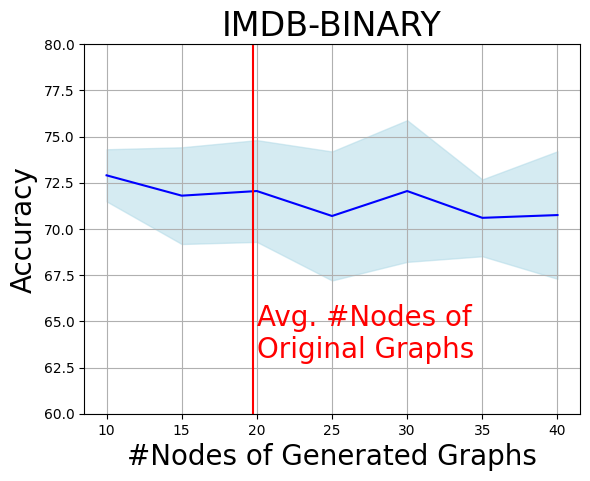

In [8]:
fig, ax = plt.subplots()
ax.grid(0.7)
ax.plot([x[0] for x in grouped.index][:7], grouped.iloc[:7, 0] * 100, 'b-')
ax.set_ylim(60.0, 80.0)
plt.fill_between([x[0] for x in grouped.index][:7], np.array(grouped.iloc[:7, 0] * 100 - grouped.iloc[:7, 1] * 100, dtype=float), np.array(grouped.iloc[:7, 0] * 100 + grouped.iloc[:7, 1] * 100, dtype=float), color='lightblue', alpha=0.5)
ax.set_ylabel('Accuracy', fontsize=20)
ax.set_xlabel('#Nodes of Generated Graphs', fontsize=20)
ax.set_title('IMDB-BINARY', fontsize=24)
ax.axvline(x = 19.77, color = 'r')
ax.text(20, 63, 'Avg. #Nodes of\nOriginal Graphs', color='red', fontsize=20)
plt.savefig('../fig/imdb-binary-exp6.png', facecolor='white', bbox_inches='tight')

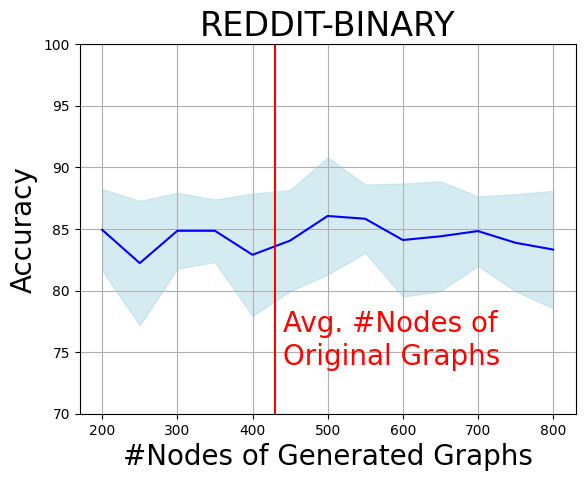

In [9]:
fig, ax = plt.subplots()
ax.grid(0.7)
ax.plot([x[0] for x in grouped.index][7:], grouped.iloc[7:, 0] * 100, 'b-')
ax.set_ylim(70.0, 100.0)
plt.fill_between([x[0] for x in grouped.index][7:], np.array(grouped.iloc[7:, 0] * 100 - grouped.iloc[7:, 1] * 100, dtype=float), np.array(grouped.iloc[7:, 0] * 100 + grouped.iloc[7:, 1] * 100, dtype=float), color='lightblue', alpha=0.5)
ax.set_ylabel('Accuracy', fontsize=20)
ax.set_xlabel('#Nodes of Generated Graphs', fontsize=20)
ax.set_title('REDDIT-BINARY', fontsize=24)
ax.axvline(x = 429.63, color = 'r')
ax.text(440, 74, 'Avg. #Nodes of\nOriginal Graphs', color='red', fontsize=20)
plt.savefig('../fig/reddit-binary-exp6.png', facecolor='white', bbox_inches='tight')

# Total GPU Hours

In [6]:
grouped = results.groupby(['Device']).agg([np.sum]).loc[:,['Time']] / (60*60)
grouped

,Time
,sum
Device,
cuda,4.176506
